Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression


In [2]:
bank = pd.read_csv("D:\\Data Science-Ayesha\\bank-full (1).csv",sep = ';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
columns= ['age','balance','duration','campaign', 'y']
data= bank[columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


In [5]:
data.shape

(45211, 5)

In [6]:
data.isnull().sum()

age         0
balance     0
duration    0
campaign    0
y           0
dtype: int64

In [7]:
#diving our data into output and input variables
input = ['age' , 'balance','duration','campaign']
output = ['y']
X= data[input]
Y=data[output]

In [8]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [9]:
#help classfier
classifier.coef_

array([[ 7.69721816e-03,  3.72191058e-05,  3.54908906e-03,
        -1.39828317e-01]])

In [10]:
classifier.intercept_

array([-3.24652358])

In [11]:
classifier.classes_

array(['no', 'yes'], dtype=object)

In [12]:
classifier.predict_proba(X)

array([[0.87367389, 0.12632611],
       [0.92488732, 0.07511268],
       [0.94596321, 0.05403679],
       ...,
       [0.30553761, 0.69446239],
       [0.82336233, 0.17663767],
       [0.86407826, 0.13592174]])

In [13]:
classifier.score(X,Y)

0.8890756674260689

In [14]:
#predict for X dataset
y_pred = classifier.predict(X)
y_pred

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [17]:
data.groupby('y').size()

y
no     39922
yes     5289
dtype: int64

In [18]:
data['output']=data.y.map({'yes':0,'no':1})

<ipython-input-18-50f23c8a8d50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['output']=data.y.map({'yes':0,'no':1})


In [20]:
data.tail(10)

,age,balance,duration,campaign,y,output
45201,53,583,226,1,yes,0
45202,34,557,224,1,yes,0
45203,23,113,266,1,yes,0
45204,73,2850,300,1,yes,0
45205,25,505,386,2,yes,0
45206,51,825,977,3,yes,0
45207,71,1729,456,2,yes,0
45208,72,5715,1127,5,yes,0
45209,57,668,508,4,no,1
45210,37,2971,361,2,no,1


<AxesSubplot:title={'center':'age'}, xlabel='y'>

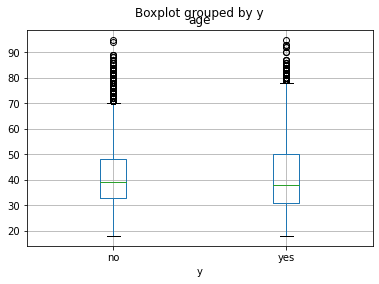

In [22]:
data.boxplot(column = 'age',by = 'y')